In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import valon_synth

In [4]:
v = valon_synth.Synthesizer('/dev/ttyUSB4')

In [5]:
v.set_frequency_a(512.0,chan_spacing=2.0)

True

In [6]:
from corr.katcp_wrapper import FpgaClient

In [7]:
r2 = FpgaClient('r2kid')

In [9]:
[x for x in r2.listbof() if x.startswith('r2qdr')]

['r2qdr_sync_adc_clock_2015_Nov_12_1209.bof']

In [10]:
r2.progdev(_9[0])

'ok'

In [11]:
r2.est_brd_clk()

256.495306

In [12]:
r2.listdev()

['dacbram',
 'dacctrl',
 'dram_bank',
 'dram_mask',
 'i0_bram',
 'i0_ctrl',
 'i0_status',
 'loopback',
 'q0_bram',
 'q0_ctrl',
 'q0_status',
 'qdr0_ctrl',
 'qdr0_memory',
 'qdr1_ctrl',
 'qdr1_memory',
 'qdr2_ctrl',
 'qdr2_memory',
 'qdr3_ctrl',
 'qdr3_memory',
 'qdr_en',
 'snap0_bram',
 'snap0_ctrl',
 'snap0_status',
 'snap1_bram',
 'snap1_ctrl',
 'snap1_status',
 'snap2_bram',
 'snap2_ctrl',
 'snap2_status',
 'snap3_bram',
 'snap3_ctrl',
 'snap3_status',
 'status',
 'sys_board_id',
 'sys_clkcounter',
 'sys_rev',
 'sys_rev_rcs',
 'sys_scratchpad']

In [13]:
import sys

In [14]:
sys.path.append('/home/readout/mlib_devel_soak/xps_sw_support/qdr/roach2')

In [15]:
import qdr

In [16]:
qdrs = [qdr.Qdr(r2,x) for x in ['qdr0','qdr1','qdr2','qdr3']]

In [23]:
for qdra in qdrs:
    print qdra.name
    qdra.qdr_cal(verbosity=1)

qdr0
--- === Trying with OUT DELAYS to 31 === ---
Eye for QDR qdr0 (0 is pass, 1 is fail):
	Tap step  0:  11111111111111111110000111110001
	Tap step  1:  11111011111111000000000100000000
	Tap step  2:  11111001111111000000000000000000
	Tap step  3:  01001000000010000000000000000000
	Tap step  4:  00000000000000000000000000000000
	Tap step  5:  00000000000000000000000000000000
	Tap step  6:  00000000000000000000000000000000
	Tap step  7:  00000000000000000000000000000000
	Tap step  8:  00000000000000000000000000000000
	Tap step  9:  00000000000000000000000000000000
	Tap step 10:  00000000000000000000000000000000
	Tap step 11:  00000000000000000000000000000000
	Tap step 12:  00000000000000000000000000000000
	Tap step 13:  00000000000000000000000000000000
	Tap step 14:  00000000000000000000000000000000
	Tap step 15:  00000000000000000000000000000000
	Tap step 16:  00000000000000000000000000000000
	Tap step 17:  00000000000000000000000000000000
	Tap step 18:  000000000000000000000000000000

In [61]:
def load_qdr(qdrnum,qdrlen=2**14):
    r2.write_int('qdr_en',0)
    data = np.arange(qdrlen)
    output = np.zeros((2*qdrlen,),dtype='>i2')
    output[2::4] = data[::2]
    output[3::4] = data[1::2]
    r2.blindwrite(('qdr%d_memory' % qdrnum),(output).tostring())
    r2.write_int('dram_mask',qdrlen-1)
    r2.write_int('dram_bank',0)
    

In [62]:
for qdrnum in range(4):
    load_qdr(qdrnum)

In [26]:
r2.listdev()

['dacbram',
 'dacctrl',
 'dram_bank',
 'dram_mask',
 'i0_bram',
 'i0_ctrl',
 'i0_status',
 'loopback',
 'q0_bram',
 'q0_ctrl',
 'q0_status',
 'qdr0_ctrl',
 'qdr0_memory',
 'qdr1_ctrl',
 'qdr1_memory',
 'qdr2_ctrl',
 'qdr2_memory',
 'qdr3_ctrl',
 'qdr3_memory',
 'qdr_en',
 'snap0_bram',
 'snap0_ctrl',
 'snap0_status',
 'snap1_bram',
 'snap1_ctrl',
 'snap1_status',
 'snap2_bram',
 'snap2_ctrl',
 'snap2_status',
 'snap3_bram',
 'snap3_ctrl',
 'snap3_status',
 'status',
 'sys_board_id',
 'sys_clkcounter',
 'sys_rev',
 'sys_rev_rcs',
 'sys_scratchpad']

In [29]:
import time

In [75]:
def get_qdr_snaps():
    r2.write_int('qdr_en',0)
    data= []
    for snap in range(4):
        r2.write_int(('snap%d_ctrl' % snap),0)
        r2.write_int(('snap%d_ctrl' % snap),1)
    r2.write_int('qdr_en',1)
    time.sleep(4)
    for snap in range(4):
        data.append(np.fromstring(r2.read(('snap%d_bram' % snap),8*2**12),dtype='>i2'))
    return data

In [84]:
data = get_qdr_snaps()

(-1000, 1000)

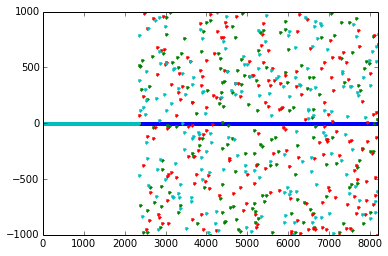

In [85]:
d0 = data[0]
for d in data:
    plot(d-d0,'.')
xlim(0,8192)
ylim(-1000,1000)

In [86]:
for d in data:
    print d[:32]

[15218 15219     0     0 15220 15221     0     0 15222 15223     0     0
 15224 15225     0     0 15226 15227     0     0 15228 15229     0     0
 15230 15231     0     0 15232 15233     0     0]
[15218 15219     0     0 15220 15221     0     0 15222 15223     0     0
 15224 15225     0     0 15226 15227     0     0 15228 15229     0     0
 15230 15231     0     0 15232 15233     0     0]
[15218 15219     0     0 15220 15221     0     0 15222 15223     0     0
 15224 15225     0     0 15226 15227     0     0 15228 15229     0     0
 15230 15231     0     0 15232 15233     0     0]
[15218 15219     0     0 15220 15221     0     0 15222 15223     0     0
 15224 15225     0     0 15226 15227     0     0 15228 15229     0     0
 15230 15231     0     0 15232 15233     0     0]
